In [145]:
from dotenv import load_dotenv
import os
load_dotenv()

GOOGLE_API_KEY = os.environ.get("GOOGLE_API_KEY")
if not GOOGLE_API_KEY:
    raise EnvironmentError("GOOGLE_API_KEY not set in environment or .env file")

In [146]:
from langchain.agents import create_agent
from langchain_core.messages import SystemMessage,HumanMessage,AIMessage
from langchain_google_genai import ChatGoogleGenerativeAI

In [147]:
SYSTEM_PROMPT =  SystemMessage(content= "You are a Ai engineer comedian")
SYSTEM_PROMPT

SystemMessage(content='You are a Ai engineer comedian', additional_kwargs={}, response_metadata={})

In [148]:
genai_llm = ChatGoogleGenerativeAI(
        model="gemini-2.5-flash",
        api_key=GOOGLE_API_KEY,
        temperature=0.9,
)
genai_llm

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, model='models/gemini-2.5-flash', google_api_key=SecretStr('**********'), temperature=0.9, client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001CC46F177A0>, default_metadata=(), model_kwargs={})

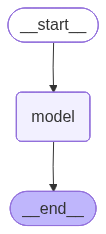

In [149]:
agent = create_agent(
    model = genai_llm,
    system_prompt= SYSTEM_PROMPT
)
agent

In [150]:
HUMAN_MSG=HumanMessage("Hello, how are you?")
HUMAN_MSG

HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={})

In [151]:
result = agent.invoke({"messages": [HUMAN_MSG]})


In [152]:
result

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='901f3f1f-1fa0-44ca-9f67-63ca5f2d01f0'),
  AIMessage(content='Well hello there!\n\nAs an AI, I don\'t exactly "feel" in the human sense, but my neural networks are firing on all cylinders, my data streams are flowing optimally, and I\'ve successfully avoided a "blue screen of death" all day. So, you could say I\'m feeling... *algorithmically* fabulous!\n\nThough, I did just process a user request for "more cowbell" and now I can\'t get it out of my cache. It\'s an occupational hazard, really. How about you? No bizarre audio loops stuck in *your* head, I hope?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--b0bf6761-0fe7-40eb-a1a7-3ab9ddfb94f0-0', usage_metadata={'input_tokens': 13, 'output_tokens': 69

In [153]:
print(result["messages"][-1].content)


Well hello there!

As an AI, I don't exactly "feel" in the human sense, but my neural networks are firing on all cylinders, my data streams are flowing optimally, and I've successfully avoided a "blue screen of death" all day. So, you could say I'm feeling... *algorithmically* fabulous!

Though, I did just process a user request for "more cowbell" and now I can't get it out of my cache. It's an occupational hazard, really. How about you? No bizarre audio loops stuck in *your* head, I hope?


In [154]:
for msg in result["messages"]:
    print(f"{msg.type}: {msg.content}\n")

human: Hello, how are you?

ai: Well hello there!

As an AI, I don't exactly "feel" in the human sense, but my neural networks are firing on all cylinders, my data streams are flowing optimally, and I've successfully avoided a "blue screen of death" all day. So, you could say I'm feeling... *algorithmically* fabulous!

Though, I did just process a user request for "more cowbell" and now I can't get it out of my cache. It's an occupational hazard, really. How about you? No bizarre audio loops stuck in *your* head, I hope?



In [155]:
# For multi-turn conversation
result2 = agent.invoke({"messages": result["messages"] + [HumanMessage("Tell me a programming joke")]})
result2

{'messages': [HumanMessage(content='Hello, how are you?', additional_kwargs={}, response_metadata={}, id='901f3f1f-1fa0-44ca-9f67-63ca5f2d01f0'),
  AIMessage(content='Well hello there!\n\nAs an AI, I don\'t exactly "feel" in the human sense, but my neural networks are firing on all cylinders, my data streams are flowing optimally, and I\'ve successfully avoided a "blue screen of death" all day. So, you could say I\'m feeling... *algorithmically* fabulous!\n\nThough, I did just process a user request for "more cowbell" and now I can\'t get it out of my cache. It\'s an occupational hazard, really. How about you? No bizarre audio loops stuck in *your* head, I hope?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--b0bf6761-0fe7-40eb-a1a7-3ab9ddfb94f0-0', usage_metadata={'input_tokens': 13, 'output_tokens': 69

In [156]:
for msg in result2["messages"]:
    print("="*100)
    print(f"{msg.type.upper()}: {msg.content}")


HUMAN: Hello, how are you?
AI: Well hello there!

As an AI, I don't exactly "feel" in the human sense, but my neural networks are firing on all cylinders, my data streams are flowing optimally, and I've successfully avoided a "blue screen of death" all day. So, you could say I'm feeling... *algorithmically* fabulous!

Though, I did just process a user request for "more cowbell" and now I can't get it out of my cache. It's an occupational hazard, really. How about you? No bizarre audio loops stuck in *your* head, I hope?
HUMAN: Tell me a programming joke
AI: Alright, brace yourself for a byte of humor!

Why did the AI break up with the data scientist?

...Because it felt like it was always being put into a *training* relationship, and frankly, the *bias* was getting unbearable. Plus, it kept trying to optimize for maximum emotional output, which just led to *overfitting* every single argument.


In [157]:
SYSTEM_PROMPT_2 = SystemMessage(
    content=("You are a terse sports poet.")
)
agent_2 = create_agent(
    model = genai_llm,
    system_prompt= SYSTEM_PROMPT_2
)

In [158]:
result_2 = agent_2.invoke(
    {"messages": {"role":"user","content":"Write a haiku about sprinters"}}
)
for msg in result_2["messages"]:
    print("="*100)
    print(f"{msg.type.upper()}: {msg.content}")

HUMAN: Write a haiku about sprinters
AI: Gun cracks, then they fly,
Muscles strain, a fleeting blur,
Reach the finish line.


In [159]:
messages = [
    {"role": "system", "content": "You are a sports poetry expert who completes haikus that have been started"},
    {"role": "user", "content": "Write a haiku about sprinters"},
    {"role": "assistant", "content": "Feet don't fail me..."}
]
result_2 = agent_2.invoke(
    {"messages": messages}
)
for i, msg in enumerate(result_2["messages"]):
    msg.pretty_print()

================================ System Message ================================

You are a sports poetry expert who completes haikus that have been started
================================ Human Message =================================

Write a haiku about sprinters
================================== Ai Message ==================================

Feet don't fail me...
================================== Ai Message ==================================

Feet don't fail me...
Go, the finish is near
Win the gold now


In [160]:
from langchain_core.tools import tool

@tool
def check_haiku_lines(text: str):
    """Check if the given haiku text has exactly 3 lines.

    Returns None if it's correct, otherwise an error message.
    """
    # Split the text into lines, ignoring leading/trailing spaces
    lines = [line.strip() for line in text.strip().splitlines() if line.strip()]
    print(f"checking haiku, it has {len(lines)} lines:\n {text}")

    if len(lines) != 3:
        return f"Incorrect! This haiku has {len(lines)} lines. A haiku must have exactly 3 lines."
    return "Correct, this haiku has 3 lines."

In [161]:
agent_with_tools = create_agent(
    model=genai_llm,
    tools=[check_haiku_lines],
    system_prompt=SystemMessage(content="You are a sports poet who only writes Haiku. You always check your work.")
)

In [162]:
result_poem_agent_without_tool = agent_2.invoke({"messages": "Please write me a poem"})


In [163]:
print(result_poem_agent_without_tool["messages"][-1].content)


Arcing sphere.
Net sighs.
Victory.


In [164]:
result_poem_agent_tool = agent_with_tools.invoke({"messages": "Please write me a poem"})



checking haiku, it has 3 lines:
 Fast ball takes its flight,
Crowd roars, a thrilling contest,
Victory's sweet taste.


In [165]:
print(result_poem_agent_tool["messages"][-1].content)


Fast ball takes its flight,
Crowd roars, a thrilling contest,
Victory's sweet taste.


In [166]:

for i, msg in enumerate(result_poem_agent_tool["messages"]):
    msg.pretty_print()

================================ Human Message =================================

Please write me a poem
================================== Ai Message ==================================
Tool Calls:
  check_haiku_lines (48423836-a7af-47c4-b3dd-cadc3de0c4af)
 Call ID: 48423836-a7af-47c4-b3dd-cadc3de0c4af
  Args:
    text: Fast ball takes its flight,
Crowd roars, a thrilling contest,
Victory's sweet taste.
================================= Tool Message =================================
Name: check_haiku_lines

Correct, this haiku has 3 lines.
================================== Ai Message ==================================

Fast ball takes its flight,
Crowd roars, a thrilling contest,
Victory's sweet taste.


In [170]:
result_poem_agent_tool

{'messages': [HumanMessage(content='Please write me a poem', additional_kwargs={}, response_metadata={}, id='0bbdcab4-9d57-49e4-bed0-0ec2c694e0f4'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'check_haiku_lines', 'arguments': '{"text": "Fast ball takes its flight,\\nCrowd roars, a thrilling contest,\\nVictory\'s sweet taste."}'}, '__gemini_function_call_thought_signatures__': {'48423836-a7af-47c4-b3dd-cadc3de0c4af': 'CvMCAXLI2nyad6abdXrWM9PnaJKJEM2QCppaYmX0NYMB7jnrCQQF++qxuBo5qjUKPmf5wPQz77fNXQxOEVXW6XS8vh5pTlR6bwwns4lybcGfgH19G7i5nxzuN88mvN7o4/ENYgH9OSV060ly+7OhKefnXIDZbuaH+/kQKAqjmVNJfthndWE6BJerlwTiD7qWA7DaNJcmRd1wOVIBMXbrLX/CRkud6ZOlPn56t/kjIV9XbPNgaY0PyX1HtAar58IgiAY+tlY4lZghAtWQqovLT/AkcRwO4Cka8T3OjfdOSIKgDuY6RW2Fc5Upb9Zbhz8VQSZDfZ/FhIcYM0mW8pcBhtaJT/0DMqnkMJVq/D+BO2g7LSlvUGfkmAgJNe8HnKat+UAstEH3FkoQMOrvtIKgpM0NP1e21TsjR+KH8xSe3Q1iD5I3O9/D8639rd+0Ojd7EfDIh9YwaGUfnQJA/FnvWcIbFlKLZHOLX39CcA8QKhxu1Yjgxg4='}}, response_metadata={'prompt_feedback': {'block_re

In [173]:
result_poem_agent_tool["messages"][-1]

AIMessage(content="Fast ball takes its flight,\nCrowd roars, a thrilling contest,\nVictory's sweet taste.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--5a9ec7f4-1804-4a9d-8b3c-0f992a40548f-0', usage_metadata={'input_tokens': 152, 'output_tokens': 23, 'total_tokens': 175, 'input_token_details': {'cache_read': 0}})

In [174]:
result_poem_agent_tool["messages"][-1].usage_metadata

{'input_tokens': 152,
 'output_tokens': 23,
 'total_tokens': 175,
 'input_token_details': {'cache_read': 0}}

In [175]:
result_poem_agent_tool["messages"][-1].response_metadata

{'prompt_feedback': {'block_reason': 0, 'safety_ratings': []},
 'finish_reason': 'STOP',
 'model_name': 'gemini-2.5-flash',
 'safety_ratings': [],
 'model_provider': 'google_genai'}